In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.contrib.slim as slim
from tensorflow.examples.tutorials.mnist import input_data

/home/taiger/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from model import GAN
from tqdm import trange

In [3]:
mnist = input_data.read_data_sets('data/', reshape=False)
batch_size = 128

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [4]:
model = GAN()

vars_d = slim.get_variables(scope='discriminator')
d_optimizer = tf.train.RMSPropOptimizer(8e-4, decay=6e-8)
d_train_step = d_optimizer.minimize(model.d_loss, var_list=vars_d)

vars_g = slim.get_variables(scope='generator')
g_optimizer = tf.train.RMSPropOptimizer(4e-4, decay=3e-8)
g_train_step = g_optimizer.minimize(model.g_loss, var_list=vars_g)

In [5]:
test_noise = np.random.uniform(-1, 1, size=[1, 100])
output_images = []

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in trange(901):
        x, _ = mnist.train.next_batch(batch_size)
        z = np.random.uniform(-1, 1, size=[batch_size, 100])
        
        sess.run([d_train_step, g_train_step], feed_dict={
            model.x: x,
            model.z: z,
            model.keep_prob: 0.5,
        })
        
        if i % 100 == 0:
            out = sess.run(model.inference, feed_dict={
                model.z: test_noise,
                model.keep_prob: 1.0,
            })
            output_images.append(np.squeeze(out[0], axis=-1))
len(output_images)

100%|██████████| 901/901 [00:48<00:00, 18.67it/s]


10

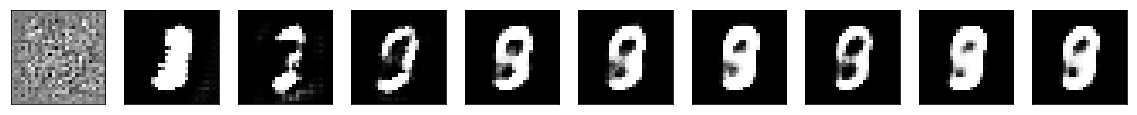

In [7]:
plt.figure(figsize=(20, 5))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.xticks([]), plt.yticks([])
    plt.imshow(output_images[i], cmap='gray')